In [24]:
import numpy as np
from pymatgen.core import Structure
from megnet.models import MEGNetModel
from megnet.data.crystal import CrystalGraph
import json

In [25]:
# 对DFT直接拟合

In [26]:
with open("/root/home/jupyter/DFT/bandgap/bandgap_json/DFT_bandgapTrain1.json", "r") as f:
    data_train = json.load(f)

In [27]:
structures = []
DFT_bandgaps = []

for item in data_train:
    structure = Structure.from_dict(item['structure'])
    gap = item['bandgap']
    structures.append(structure)
    DFT_bandgaps.append(gap)

In [28]:
#5是最低截断半径，用以判断哪两个原子之间有键连接

In [29]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# 设置参数列表
nfeat_bond_list = [10, 15, 20, 25, 30]
r_cutoff_list = [6, 7, 8]

# 初始化结果记录
results = []

# 循环训练模型
for nfeat_bond in nfeat_bond_list:
    for r_cutoff in r_cutoff_list:
        # 设置参数
        gaussian_centers = np.linspace(0, r_cutoff+1, nfeat_bond)
        gaussian_width = 0.5
        graph_converter = CrystalGraph(cutoff=r_cutoff)
        
        # 初始化模型
        model = MEGNetModel(graph_converter=graph_converter, centers=gaussian_centers, width=gaussian_width)
        
        # 训练模型
        model.train(structures,DFT_bandgaps, epochs=200)
        
        # 预测结果
        predictions = []
        for structure in structures:
            prediction = model.predict_structure(structure)
            predictions.append(prediction[0])
        
        # 计算评估指标
        mse = mean_squared_error(DFT_bandgaps, predictions)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(DFT_bandgaps, predictions)
        r2 = r2_score(DFT_bandgaps, predictions)
        
        # 记录结果
        results.append({
            'nfeat_bond': nfeat_bond,
            'r_cutoff': r_cutoff,
            'mse': mse,
            'rmse': rmse,
            'mae': mae,
            'r2': r2
        })



/opt/tefscloud/miniconda3/lib/python3.9/site-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


Epoch 1/200
1/1 [==============================] - 20s 20s/step - loss: 3.7850
Epoch 2/200
1/1 [==============================] - 1s 766ms/step - loss: 3.6384
Epoch 3/200
1/1 [==============================] - 1s 757ms/step - loss: 3.4773
Epoch 4/200
1/1 [==============================] - 1s 768ms/step - loss: 3.2904
Epoch 5/200
1/1 [==============================] - 1s 763ms/step - loss: 3.0708
Epoch 6/200
1/1 [==============================] - 1s 773ms/step - loss: 2.8114
Epoch 7/200
1/1 [==============================] - 1s 763ms/step - loss: 2.5048
Epoch 8/200
1/1 [==============================] - 1s 762ms/step - loss: 2.1440
Epoch 9/200
1/1 [==============================] - 1s 771ms/step - loss: 1.7252
Epoch 10/200
1/1 [==============================] - 1s 759ms/step - loss: 1.2531
Epoch 11/200
1/1 [==============================] - 1s 768ms/step - loss: 0.7557
Epoch 12/200
1/1 [==============================] - 1s 764ms/step - loss: 0.3207
Epoch 13/200
1/1 [====================

/opt/tefscloud/miniconda3/lib/python3.9/site-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


Epoch 1/200
1/1 [==============================] - 20s 20s/step - loss: 3.8096
Epoch 2/200
1/1 [==============================] - 1s 1s/step - loss: 3.6347
Epoch 3/200
1/1 [==============================] - 1s 1s/step - loss: 3.4511
Epoch 4/200
1/1 [==============================] - 1s 1s/step - loss: 3.2463
Epoch 5/200
1/1 [==============================] - 1s 1s/step - loss: 3.0138
Epoch 6/200
1/1 [==============================] - 1s 1s/step - loss: 2.7481
Epoch 7/200
1/1 [==============================] - 1s 1s/step - loss: 2.4444
Epoch 8/200
1/1 [==============================] - 1s 1s/step - loss: 2.0996
Epoch 9/200
1/1 [==============================] - 1s 1s/step - loss: 1.7138
Epoch 10/200
1/1 [==============================] - 1s 1s/step - loss: 1.2943
Epoch 11/200
1/1 [==============================] - 1s 1s/step - loss: 0.8625
Epoch 12/200
1/1 [==============================] - 1s 1s/step - loss: 0.4677
Epoch 13/200
1/1 [==============================] - 1s 1s/step - loss: 

/opt/tefscloud/miniconda3/lib/python3.9/site-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


Epoch 1/200
1/1 [==============================] - 20s 20s/step - loss: 3.7828
Epoch 2/200
1/1 [==============================] - 2s 2s/step - loss: 3.6204
Epoch 3/200
1/1 [==============================] - 2s 2s/step - loss: 3.4417
Epoch 4/200
1/1 [==============================] - 2s 2s/step - loss: 3.2348
Epoch 5/200
1/1 [==============================] - 2s 2s/step - loss: 2.9921
Epoch 6/200
1/1 [==============================] - 2s 2s/step - loss: 2.7062
Epoch 7/200
1/1 [==============================] - 2s 2s/step - loss: 2.3691
Epoch 8/200
1/1 [==============================] - 2s 2s/step - loss: 1.9735
Epoch 9/200
1/1 [==============================] - 2s 2s/step - loss: 1.5170
Epoch 10/200
1/1 [==============================] - 2s 2s/step - loss: 1.0116
Epoch 11/200
1/1 [==============================] - 2s 2s/step - loss: 0.5117
Epoch 12/200
1/1 [==============================] - 2s 2s/step - loss: 0.1878
Epoch 13/200
1/1 [==============================] - 2s 2s/step - loss: 

/opt/tefscloud/miniconda3/lib/python3.9/site-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


Epoch 1/200
1/1 [==============================] - 21s 21s/step - loss: 3.7993
Epoch 2/200
1/1 [==============================] - 1s 774ms/step - loss: 3.6565
Epoch 3/200
1/1 [==============================] - 1s 768ms/step - loss: 3.5003
Epoch 4/200
1/1 [==============================] - 1s 757ms/step - loss: 3.3186
Epoch 5/200
1/1 [==============================] - 1s 772ms/step - loss: 3.1036
Epoch 6/200
1/1 [==============================] - 1s 767ms/step - loss: 2.8475
Epoch 7/200
1/1 [==============================] - 1s 770ms/step - loss: 2.5417
Epoch 8/200
1/1 [==============================] - 1s 759ms/step - loss: 2.1772
Epoch 9/200
1/1 [==============================] - 1s 766ms/step - loss: 1.7475
Epoch 10/200
1/1 [==============================] - 1s 759ms/step - loss: 1.2555
Epoch 11/200
1/1 [==============================] - 1s 771ms/step - loss: 0.7316
Epoch 12/200
1/1 [==============================] - 1s 757ms/step - loss: 0.2857
Epoch 13/200
1/1 [====================

/opt/tefscloud/miniconda3/lib/python3.9/site-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


Epoch 1/200
1/1 [==============================] - 21s 21s/step - loss: 3.7778
Epoch 2/200
1/1 [==============================] - 1s 1s/step - loss: 3.6164
Epoch 3/200
1/1 [==============================] - 1s 1s/step - loss: 3.4404
Epoch 4/200
1/1 [==============================] - 1s 1s/step - loss: 3.2378
Epoch 5/200
1/1 [==============================] - 1s 1s/step - loss: 2.9998
Epoch 6/200
1/1 [==============================] - 1s 1s/step - loss: 2.7176
Epoch 7/200
1/1 [==============================] - 1s 1s/step - loss: 2.3826
Epoch 8/200
1/1 [==============================] - 1s 1s/step - loss: 1.9873
Epoch 9/200
1/1 [==============================] - 1s 1s/step - loss: 1.5292
Epoch 10/200
1/1 [==============================] - 1s 1s/step - loss: 1.0208
Epoch 11/200
1/1 [==============================] - 1s 1s/step - loss: 0.5169
Epoch 12/200
1/1 [==============================] - 1s 1s/step - loss: 0.1896
Epoch 13/200
1/1 [==============================] - 1s 1s/step - loss: 

/opt/tefscloud/miniconda3/lib/python3.9/site-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


Epoch 1/200
1/1 [==============================] - 22s 22s/step - loss: 3.7539
Epoch 2/200
1/1 [==============================] - 2s 2s/step - loss: 3.5869
Epoch 3/200
1/1 [==============================] - 2s 2s/step - loss: 3.3959
Epoch 4/200
1/1 [==============================] - 2s 2s/step - loss: 3.1692
Epoch 5/200
1/1 [==============================] - 2s 2s/step - loss: 2.8978
Epoch 6/200
1/1 [==============================] - 2s 2s/step - loss: 2.5719
Epoch 7/200
1/1 [==============================] - 2s 2s/step - loss: 2.1816
Epoch 8/200
1/1 [==============================] - 2s 2s/step - loss: 1.7198
Epoch 9/200
1/1 [==============================] - 2s 2s/step - loss: 1.1910
Epoch 10/200
1/1 [==============================] - 2s 2s/step - loss: 0.6376
Epoch 11/200
1/1 [==============================] - 2s 2s/step - loss: 0.2177
Epoch 12/200
1/1 [==============================] - 2s 2s/step - loss: 0.4009
Epoch 13/200
1/1 [==============================] - 2s 2s/step - loss: 

/opt/tefscloud/miniconda3/lib/python3.9/site-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


Epoch 1/200
1/1 [==============================] - 19s 19s/step - loss: 3.8110
Epoch 2/200
1/1 [==============================] - 1s 773ms/step - loss: 3.6780
Epoch 3/200
1/1 [==============================] - 1s 776ms/step - loss: 3.5362
Epoch 4/200
1/1 [==============================] - 1s 776ms/step - loss: 3.3746
Epoch 5/200
1/1 [==============================] - 1s 768ms/step - loss: 3.1863
Epoch 6/200
1/1 [==============================] - 1s 767ms/step - loss: 2.9647
Epoch 7/200
1/1 [==============================] - 1s 774ms/step - loss: 2.7029
Epoch 8/200
1/1 [==============================] - 1s 775ms/step - loss: 2.3935
Epoch 9/200
1/1 [==============================] - 1s 765ms/step - loss: 2.0300
Epoch 10/200
1/1 [==============================] - 1s 775ms/step - loss: 1.6096
Epoch 11/200
1/1 [==============================] - 1s 774ms/step - loss: 1.1403
Epoch 12/200
1/1 [==============================] - 1s 768ms/step - loss: 0.6575
Epoch 13/200
1/1 [====================

/opt/tefscloud/miniconda3/lib/python3.9/site-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


Epoch 1/200
1/1 [==============================] - 22s 22s/step - loss: 3.7496
Epoch 2/200
1/1 [==============================] - 1s 1s/step - loss: 3.6005
Epoch 3/200
1/1 [==============================] - 1s 1s/step - loss: 3.4365
Epoch 4/200
1/1 [==============================] - 1s 1s/step - loss: 3.2489
Epoch 5/200
1/1 [==============================] - 1s 1s/step - loss: 3.0318
Epoch 6/200
1/1 [==============================] - 1s 1s/step - loss: 2.7800
Epoch 7/200
1/1 [==============================] - 1s 1s/step - loss: 2.4876
Epoch 8/200
1/1 [==============================] - 1s 1s/step - loss: 2.1498
Epoch 9/200
1/1 [==============================] - 1s 1s/step - loss: 1.7645
Epoch 10/200
1/1 [==============================] - 1s 1s/step - loss: 1.3363
Epoch 11/200
1/1 [==============================] - 1s 1s/step - loss: 0.8855
Epoch 12/200
1/1 [==============================] - 1s 1s/step - loss: 0.4650
Epoch 13/200
1/1 [==============================] - 1s 1s/step - loss: 

/opt/tefscloud/miniconda3/lib/python3.9/site-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


Epoch 1/200
1/1 [==============================] - 23s 23s/step - loss: 3.7669
Epoch 2/200
1/1 [==============================] - 2s 2s/step - loss: 3.6259
Epoch 3/200
1/1 [==============================] - 2s 2s/step - loss: 3.4714
Epoch 4/200
1/1 [==============================] - 2s 2s/step - loss: 3.2945
Epoch 5/200
1/1 [==============================] - 2s 2s/step - loss: 3.0889
Epoch 6/200
1/1 [==============================] - 2s 2s/step - loss: 2.8486
Epoch 7/200
1/1 [==============================] - 2s 2s/step - loss: 2.5676
Epoch 8/200
1/1 [==============================] - 2s 2s/step - loss: 2.2402
Epoch 9/200
1/1 [==============================] - 2s 2s/step - loss: 1.8624
Epoch 10/200
1/1 [==============================] - 2s 2s/step - loss: 1.4348
Epoch 11/200
1/1 [==============================] - 2s 2s/step - loss: 0.9707
Epoch 12/200
1/1 [==============================] - 2s 2s/step - loss: 0.5148
Epoch 13/200
1/1 [==============================] - 2s 2s/step - loss: 

/opt/tefscloud/miniconda3/lib/python3.9/site-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


Epoch 1/200
1/1 [==============================] - 21s 21s/step - loss: 3.7656
Epoch 2/200
1/1 [==============================] - 1s 765ms/step - loss: 3.5932
Epoch 3/200
1/1 [==============================] - 1s 768ms/step - loss: 3.4057
Epoch 4/200
1/1 [==============================] - 1s 770ms/step - loss: 3.1928
Epoch 5/200
1/1 [==============================] - 1s 766ms/step - loss: 2.9482
Epoch 6/200
1/1 [==============================] - 1s 762ms/step - loss: 2.6658
Epoch 7/200
1/1 [==============================] - 1s 768ms/step - loss: 2.3401
Epoch 8/200
1/1 [==============================] - 1s 771ms/step - loss: 1.9665
Epoch 9/200
1/1 [==============================] - 1s 767ms/step - loss: 1.5451
Epoch 10/200
1/1 [==============================] - 1s 762ms/step - loss: 1.0863
Epoch 11/200
1/1 [==============================] - 1s 765ms/step - loss: 0.6259
Epoch 12/200
1/1 [==============================] - 1s 764ms/step - loss: 0.2607
Epoch 13/200
1/1 [====================

/opt/tefscloud/miniconda3/lib/python3.9/site-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


Epoch 1/200
1/1 [==============================] - 20s 20s/step - loss: 3.8144
Epoch 2/200
1/1 [==============================] - 1s 1s/step - loss: 3.6745
Epoch 3/200
1/1 [==============================] - 1s 1s/step - loss: 3.5288
Epoch 4/200
1/1 [==============================] - 1s 1s/step - loss: 3.3648
Epoch 5/200
1/1 [==============================] - 1s 1s/step - loss: 3.1750
Epoch 6/200
1/1 [==============================] - 1s 1s/step - loss: 2.9520
Epoch 7/200
1/1 [==============================] - 1s 1s/step - loss: 2.6881
Epoch 8/200
1/1 [==============================] - 1s 1s/step - loss: 2.3751
Epoch 9/200
1/1 [==============================] - 1s 1s/step - loss: 2.0050
Epoch 10/200
1/1 [==============================] - 1s 1s/step - loss: 1.5731
Epoch 11/200
1/1 [==============================] - 1s 1s/step - loss: 1.0862
Epoch 12/200
1/1 [==============================] - 1s 1s/step - loss: 0.5851
Epoch 13/200
1/1 [==============================] - 1s 1s/step - loss: 

/opt/tefscloud/miniconda3/lib/python3.9/site-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


Epoch 1/200
1/1 [==============================] - 23s 23s/step - loss: 3.8051
Epoch 2/200
1/1 [==============================] - 2s 2s/step - loss: 3.6513
Epoch 3/200
1/1 [==============================] - 2s 2s/step - loss: 3.4840
Epoch 4/200
1/1 [==============================] - 2s 2s/step - loss: 3.2890
Epoch 5/200
1/1 [==============================] - 2s 2s/step - loss: 3.0565
Epoch 6/200
1/1 [==============================] - 2s 2s/step - loss: 2.7769
Epoch 7/200
1/1 [==============================] - 2s 2s/step - loss: 2.4399
Epoch 8/200
1/1 [==============================] - 2s 2s/step - loss: 2.0346
Epoch 9/200
1/1 [==============================] - 2s 2s/step - loss: 1.5544
Epoch 10/200
1/1 [==============================] - 2s 2s/step - loss: 1.0097
Epoch 11/200
1/1 [==============================] - 2s 2s/step - loss: 0.4676
Epoch 12/200
1/1 [==============================] - 2s 2s/step - loss: 0.1787
Epoch 13/200
1/1 [==============================] - 2s 2s/step - loss: 

/opt/tefscloud/miniconda3/lib/python3.9/site-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


Epoch 1/200
1/1 [==============================] - 22s 22s/step - loss: 3.8195
Epoch 2/200
1/1 [==============================] - 1s 765ms/step - loss: 3.6723
Epoch 3/200
1/1 [==============================] - 1s 761ms/step - loss: 3.5207
Epoch 4/200
1/1 [==============================] - 1s 768ms/step - loss: 3.3539
Epoch 5/200
1/1 [==============================] - 1s 765ms/step - loss: 3.1632
Epoch 6/200
1/1 [==============================] - 1s 760ms/step - loss: 2.9407
Epoch 7/200
1/1 [==============================] - 1s 761ms/step - loss: 2.6783
Epoch 8/200
1/1 [==============================] - 1s 778ms/step - loss: 2.3682
Epoch 9/200
1/1 [==============================] - 1s 766ms/step - loss: 2.0028
Epoch 10/200
1/1 [==============================] - 1s 759ms/step - loss: 1.5785
Epoch 11/200
1/1 [==============================] - 1s 762ms/step - loss: 1.1030
Epoch 12/200
1/1 [==============================] - 1s 763ms/step - loss: 0.6150
Epoch 13/200
1/1 [====================

/opt/tefscloud/miniconda3/lib/python3.9/site-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


Epoch 1/200
1/1 [==============================] - 22s 22s/step - loss: 3.7759
Epoch 2/200
1/1 [==============================] - 1s 1s/step - loss: 3.5985
Epoch 3/200
1/1 [==============================] - 1s 1s/step - loss: 3.4071
Epoch 4/200
1/1 [==============================] - 1s 1s/step - loss: 3.1895
Epoch 5/200
1/1 [==============================] - 1s 1s/step - loss: 2.9380
Epoch 6/200
1/1 [==============================] - 1s 1s/step - loss: 2.6451
Epoch 7/200
1/1 [==============================] - 1s 1s/step - loss: 2.3029
Epoch 8/200
1/1 [==============================] - 1s 1s/step - loss: 1.9053
Epoch 9/200
1/1 [==============================] - 1s 1s/step - loss: 1.4518
Epoch 10/200
1/1 [==============================] - 1s 1s/step - loss: 0.9576
Epoch 11/200
1/1 [==============================] - 1s 1s/step - loss: 0.4796
Epoch 12/200
1/1 [==============================] - 1s 1s/step - loss: 0.1837
Epoch 13/200
1/1 [==============================] - 1s 1s/step - loss: 

/opt/tefscloud/miniconda3/lib/python3.9/site-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


Epoch 1/200
1/1 [==============================] - 21s 21s/step - loss: 3.7801
Epoch 2/200
1/1 [==============================] - 2s 2s/step - loss: 3.6228
Epoch 3/200
1/1 [==============================] - 2s 2s/step - loss: 3.4537
Epoch 4/200
1/1 [==============================] - 2s 2s/step - loss: 3.2615
Epoch 5/200
1/1 [==============================] - 2s 2s/step - loss: 3.0394
Epoch 6/200
1/1 [==============================] - 2s 2s/step - loss: 2.7810
Epoch 7/200
1/1 [==============================] - 2s 2s/step - loss: 2.4804
Epoch 8/200
1/1 [==============================] - 2s 2s/step - loss: 2.1324
Epoch 9/200
1/1 [==============================] - 2s 2s/step - loss: 1.7349
Epoch 10/200
1/1 [==============================] - 2s 2s/step - loss: 1.2941
Epoch 11/200
1/1 [==============================] - 2s 2s/step - loss: 0.8340
Epoch 12/200
1/1 [==============================] - 2s 2s/step - loss: 0.4179
Epoch 13/200
1/1 [==============================] - 2s 2s/step - loss: 

In [30]:
# 打印结果
for result in results:
    print(f"nfeat_bond: {result['nfeat_bond']}, r_cutoff: {result['r_cutoff']}, MSE: {result['mse']}, RMSE: {result['rmse']}, MAE: {result['mae']}, R2: {result['r2']}")


nfeat_bond: 10, r_cutoff: 6, MSE: 0.02223575110847752, RMSE: 0.14911656885965932, MAE: 0.11755811248667097, R2: 0.8734323750618905
nfeat_bond: 10, r_cutoff: 7, MSE: 0.01586331653941649, RMSE: 0.12594965875069486, MAE: 0.10403812747469139, R2: 0.909704768314757
nfeat_bond: 10, r_cutoff: 8, MSE: 0.05580048722139152, RMSE: 0.23622126750441316, MAE: 0.15333828481973388, R2: 0.6823792862428552
nfeat_bond: 15, r_cutoff: 6, MSE: 0.013398703461047773, RMSE: 0.11575276869711486, MAE: 0.09939311520632575, R2: 0.9237335376690606
nfeat_bond: 15, r_cutoff: 7, MSE: 0.01634214891550395, RMSE: 0.12783641466931067, MAE: 0.10499909810084923, R2: 0.9069792171836439
nfeat_bond: 15, r_cutoff: 8, MSE: 0.021601912080922124, RMSE: 0.1469758894544344, MAE: 0.12300815843133366, R2: 0.8770402361104962
nfeat_bond: 20, r_cutoff: 6, MSE: 0.011300865338954674, RMSE: 0.10630552826149106, MAE: 0.09133312172235228, R2: 0.935674595442311
nfeat_bond: 20, r_cutoff: 7, MSE: 0.008909704725823111, RMSE: 0.09439123225079282, 

In [10]:
def get_best_r2(results):
    # 找到R2最大的结果
    best_result = max(results, key=lambda result: result['r2'])
    return best_result

def get_best_rmse(results):
    # 计算每个结果的RMSE
    for result in results:
        result['rmse'] = np.sqrt(result['mse'])
    
    # 找到RMSE最小的结果
    best_result = min(results, key=lambda result: result['rmse'])
    return best_result


In [31]:
best_r2_result = get_best_r2(results)
print(f"Best R2: {best_r2_result['r2']}, nfeat_bond: {best_r2_result['nfeat_bond']}, r_cutoff: {best_r2_result['r_cutoff']}")

best_rmse_result = get_best_rmse(results)
print(f"Best RMSE: {best_rmse_result['rmse']}, nfeat_bond: {best_rmse_result['nfeat_bond']}, r_cutoff: {best_rmse_result['r_cutoff']}")


Best R2: 0.9553490899810362, nfeat_bond: 25, r_cutoff: 6
Best RMSE: 0.08856859270688139, nfeat_bond: 25, r_cutoff: 6


In [14]:
def get_best_mae(results):
    # 计算每个结果的MAE
    for result in results:
        result['mae'] = mean_absolute_error(DFT_bandgaps, predictions)
    
    # 找到MAE最小的结果
    best_result = min(results, key=lambda result: result['mae'])
    return best_result

In [32]:
best_mae_result = get_best_mae(results)
print(f"Best MAE: {best_mae_result['mae']}, nfeat_bond: {best_mae_result['nfeat_bond']}, r_cutoff: {best_mae_result['r_cutoff']}")


Best MAE: 0.24143088398166732, nfeat_bond: 10, r_cutoff: 6


In [33]:
import json  
import pandas as pd  
  

# 将结果保存为JSON文件  
with open('./json/Megnet_DFTbandgapsresults.json', 'w') as f:  
    json.dump(results, f)  
# 将结果转换为DataFrame并保存为表格文件  
df_results = pd.DataFrame(results)  
df_results.to_csv('./excel/Megnet_DFTbandgapsresults.csv', index=False)

# 训练集拟合

In [46]:
with open("/root/home/jupyter/JupyterLab/bandgap-train/json/predicition_results_megnetGapTrain.json", "r") as f:
    data_train1 = json.load(f)

In [47]:
len(data_train1)

90

In [48]:
structures_train = []
DFT_bandgaps_train = []

for item in data_train1:
    structure = Structure.from_dict(item['structure'])
    gap = item['DFT_bandgaps']
    structures_train.append(structure)
    DFT_bandgaps_train.append(gap)

In [49]:
len(structures_train)

90

In [50]:
len(DFT_bandgaps_train)

90

In [51]:
nfeat_bond = 25
r_cutoff = 6
gaussian_centers = np.linspace(0, r_cutoff+1, nfeat_bond)
gaussian_width = 0.5
graph_converter = CrystalGraph(cutoff=r_cutoff)
model = MEGNetModel(graph_converter=graph_converter, centers=gaussian_centers, width=gaussian_width)

/opt/tefscloud/miniconda3/lib/python3.9/site-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


In [52]:
model.train(structures_train, DFT_bandgaps_train, epochs=200)

Epoch 1/200
1/1 [==============================] - 19s 19s/step - loss: 3.7401
Epoch 2/200
1/1 [==============================] - 1s 725ms/step - loss: 3.5725
Epoch 3/200
1/1 [==============================] - 1s 707ms/step - loss: 3.3929
Epoch 4/200
1/1 [==============================] - 1s 715ms/step - loss: 3.1910
Epoch 5/200
1/1 [==============================] - 1s 720ms/step - loss: 2.9600
Epoch 6/200
1/1 [==============================] - 1s 715ms/step - loss: 2.6935
Epoch 7/200
1/1 [==============================] - 1s 706ms/step - loss: 2.3852
Epoch 8/200
1/1 [==============================] - 1s 713ms/step - loss: 2.0298
Epoch 9/200
1/1 [==============================] - 1s 721ms/step - loss: 1.6256
Epoch 10/200
1/1 [==============================] - 1s 713ms/step - loss: 1.1794
Epoch 11/200
1/1 [==============================] - 1s 726ms/step - loss: 0.7192
Epoch 12/200
1/1 [==============================] - 1s 718ms/step - loss: 0.3223
Epoch 13/200
1/1 [====================

In [53]:
# 使用模型预测能带差
predictions_train = []
for structure in structures_train:
    prediction = model.predict_structure(structure)
    predictions_train.append(prediction)

In [54]:
predictions_train_ = [pred[0].item() for pred in predictions_train]
predictions_train_

[1.601666808128357,
 1.5805696249008179,
 1.7388194799423218,
 1.9142907857894897,
 2.4374477863311768,
 1.842910647392273,
 1.813948154449463,
 1.7934226989746094,
 1.736084222793579,
 1.7898471355438232,
 1.5579497814178467,
 1.6623587608337402,
 1.6300281286239624,
 1.5323736667633057,
 2.642003297805786,
 1.6846922636032104,
 1.877421259880066,
 1.6859748363494873,
 1.5458691120147705,
 1.802614688873291,
 1.551337718963623,
 2.661860466003418,
 2.4951961040496826,
 1.6634409427642822,
 1.7926992177963257,
 1.7993290424346924,
 1.6787351369857788,
 1.768860101699829,
 1.7916126251220703,
 1.731427550315857,
 1.6796612739562988,
 1.5476449728012085,
 1.7738980054855347,
 1.7026658058166504,
 1.7824052572250366,
 1.8421813249588013,
 1.7961844205856323,
 1.701458215713501,
 1.5347607135772705,
 1.5796797275543213,
 1.733102560043335,
 2.4652554988861084,
 2.5709550380706787,
 1.648216724395752,
 1.816195011138916,
 2.4587957859039307,
 2.4590885639190674,
 1.532601237297058,
 1.72225

In [55]:
# 计算均方根误差、平均绝对误差和R²,# 计算MAE
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score  

rmse_train = np.sqrt(mean_squared_error(DFT_bandgaps_train, predictions_train_))
mae_train = mean_absolute_error(DFT_bandgaps_train, predictions_train_)
r2_train = r2_score(DFT_bandgaps_train, predictions_train_)

In [56]:
print(r2_train)
print(mae_train)
print(rmse_train)

0.9246959945242973
0.10060229306750826
0.1130398749892451


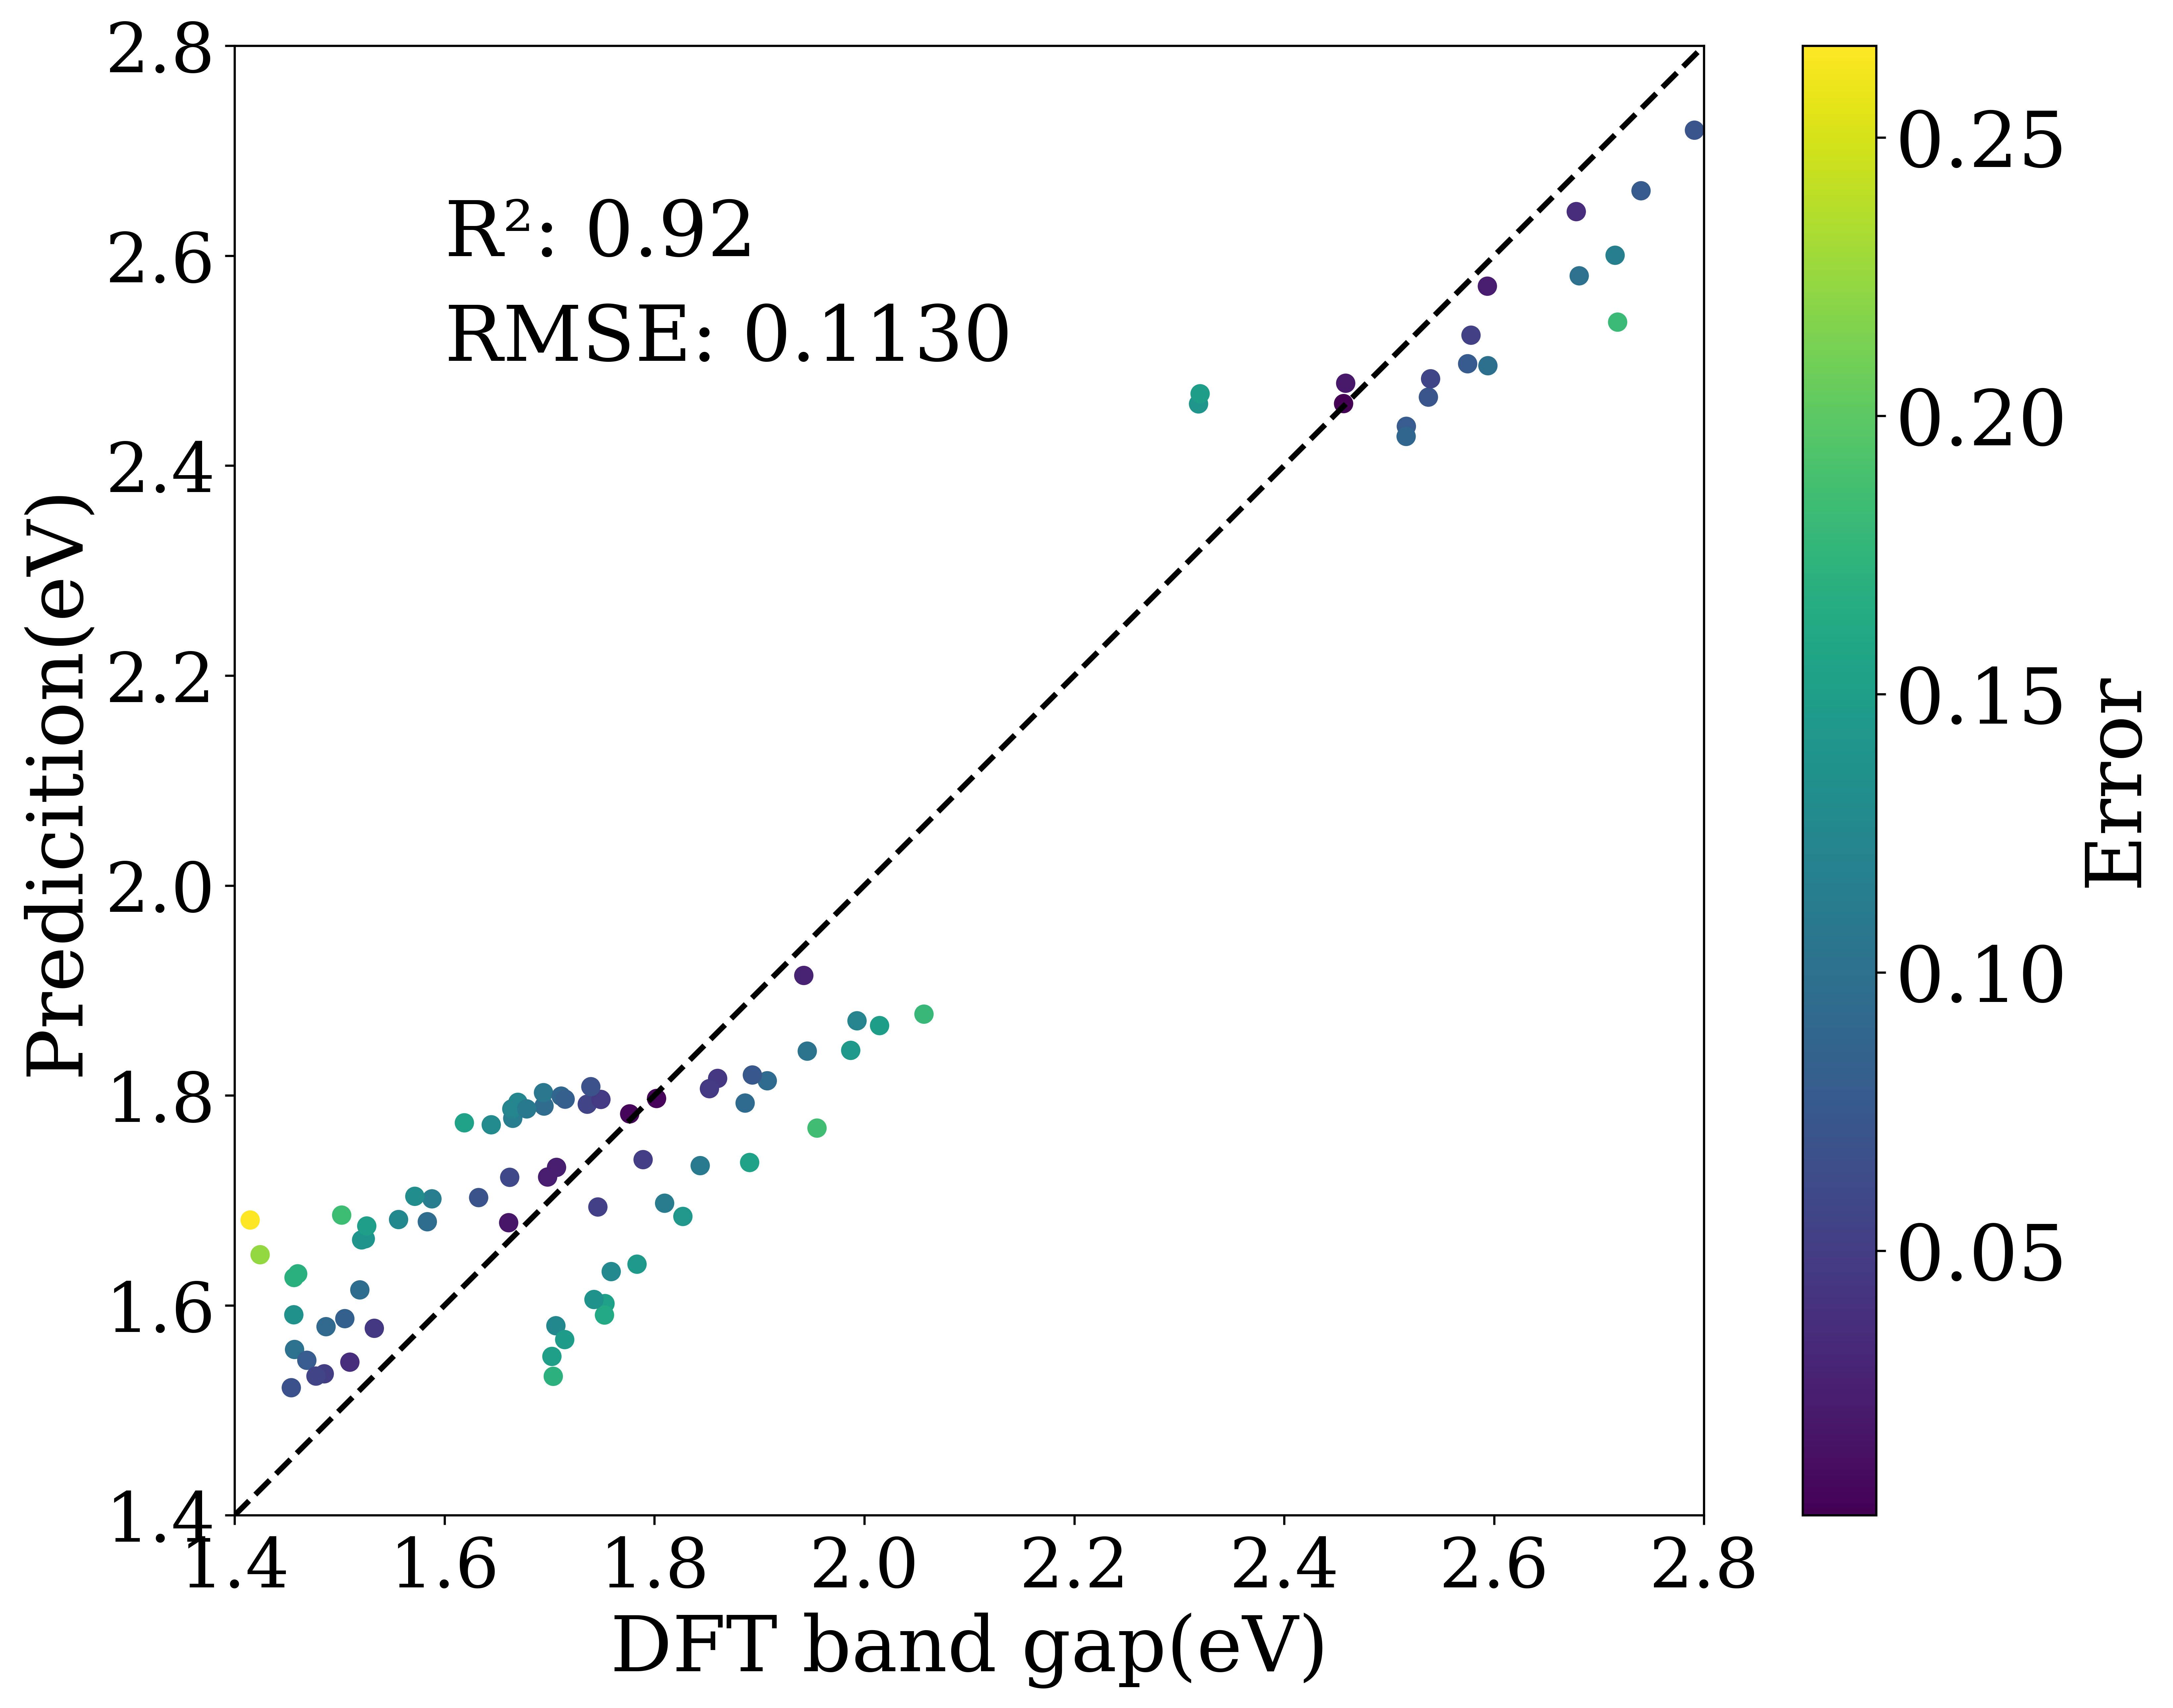

In [59]:
# 导入模块      
import matplotlib.pyplot as plt      
import numpy as np      
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score    
  
# 先将列表转化为numpy数组      
DFT_bandgaps_np_ = np.array(DFT_bandgaps_train)      
predictions_np_ = np.array(predictions_train_)   
  
# 计算预测值和实际值之间的绝对误差    
distances = np.abs(DFT_bandgaps_np_ - predictions_np_)      
    
# 更改默认字体为DejaVu Serif    
plt.rcParams['font.family'] = 'DejaVu Serif'    
    
# 绘制图像    
fig = plt.figure(figsize=(12.8, 9.6),dpi = 600)    
plt.scatter(DFT_bandgaps_np_, predictions_np_, c=distances, cmap='viridis')  # 使用'viridis'颜色映射

# 添加颜色条
cbar = plt.colorbar()  
cbar.ax.tick_params(labelsize=28) 
cbar.ax.set_ylabel('Error', fontsize=28)

# 添加参考线
plt.plot(np.linspace(1.4, 2.8, 100), np.linspace(1.4, 2.8, 100), linewidth=2, linestyle="--", color="black")    

# 设置x轴和y轴的范围
plt.xlim(1.4, 2.8)    
plt.ylim(1.4, 2.8)

# 设置x轴和y轴的刻度，字体大小为25

plt.xticks(fontsize=25)  
plt.yticks(fontsize=25)    

# 设置x轴和y轴的标签
plt.xlabel("DFT band gap(eV)", fontsize=28)    
plt.ylabel("Predicition(eV)", fontsize=28)    

# 强制将x轴和y轴的实际长度设置为相同的值
plt.gca().set_aspect('equal', adjustable='box')

# 设置均方根误差、平均绝对误差和R²的文本位置和字体大小
plt.text(1.6, 2.6, 'R²: {:.2f}'.format(r2_train), fontsize=28)  
plt.text(1.6, 2.5, 'RMSE: {:.4f}'.format(rmse_train), fontsize=28)  
#plt.text(-0.5, 0.3, 'MAE: {:.4f}'.format(mae), fontsize=16)  
  
# 在图上添加算法名称  
#plt.text(-0.5, 0.6, 'MEGNet', fontsize=16)  
plt.savefig('./photo/Megnet_Prediction_DFTbandgap_train.jpg',bbox_inches='tight')  
plt.show()  
plt.close()